In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
tracsale_data=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Python Class/ML Case studies/Sales-and-Marketing.csv")

In [3]:
tracsale_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [4]:
tracsale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [5]:
dates=pd.date_range(start='2011-01-01', freq='MS',periods=len(tracsale_data))
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [6]:
tracsale_data.rename(columns={'Sales':'Tractor-Sales','Marketing Expense':'Marketing-Expense'}, inplace=True)
tracsale_data.set_index(dates, inplace=True)
tracsale_data.head(5)

,Time Period,Tractor-Sales,Marketing-Expense
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [7]:
# extract out the time-series
sales_ts = tracsale_data['Tractor-Sales']

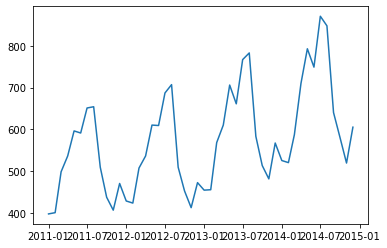

In [8]:
plt.plot(sales_ts)

In [9]:
# Method-2  By MA for looking tends etc.
tracsale_data.rolling(window=4).mean()

,Tractor-Sales,Marketing-Expense
2011-01-01,NaN,NaN
2011-02-01,NaN,NaN
2011-03-01,NaN,NaN
2011-04-01,457.75,497.6725
2011-05-01,507.50,562.0500
2011-06-01,555.25,573.7850
2011-07-01,593.50,627.0650
2011-08-01,623.00,680.1525
2011-09-01,601.25,630.8925
2011-10-01,562.75,589.4100


#### Asumption Check..( Wether Series Stationary or not)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.434334
p-value                         0.997265
#lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


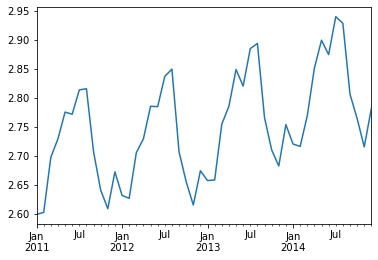

In [12]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.plot()

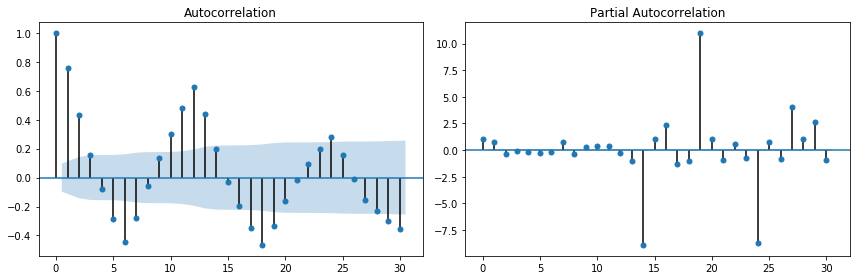

In [39]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [13]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  0.897455
p-value                         0.993057
#lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


#### p-value >0.05, so series is not stationary

In [14]:
sales_ts_diff1 = sales_ts.diff(1)
sales_ts_diff1.dropna(inplace=True)

In [15]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.015650e+00
p-value                        6.743731e-10
#lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


This is Mulivariate data so we will use ARIMAX model for building a model.


In [16]:
tracsale_data['Mkt_Exp_Lag_1'] = tracsale_data['Marketing-Expense'].shift(1)
tracsale_data['Mkt_Exp_Lag_2'] = tracsale_data['Marketing-Expense'].shift(2)
tracsale_data['Mkt_Exp_Lag_3'] = tracsale_data['Marketing-Expense'].shift(3)
tracsale_data['Mkt_Exp_Lag_4'] = tracsale_data['Marketing-Expense'].shift(4)

In [17]:
tracsale_data.head()

,Time Period,Tractor-Sales,Marketing-Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-01-01,Jan-11,397,486.64,NaN,NaN,NaN,NaN
2011-02-01,Feb-11,400,501.80,486.64,NaN,NaN,NaN
2011-03-01,Mar-11,498,437.09,501.80,486.64,NaN,NaN
2011-04-01,Apr-11,536,565.16,437.09,501.80,486.64,NaN
2011-05-01,May-11,596,744.15,565.16,437.09,501.80,486.64


In [18]:
import itertools
import sys
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [19]:
tracsale_data.dropna(inplace=True)
tracsale_data

,Time Period,Tractor-Sales,Marketing-Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-05-01,May-11,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,Jun-11,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,Jul-11,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,Aug-11,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,Sep-11,509,547.11,777.51,650.21,548.74,744.15
2011-10-01,Oct-11,437,382.81,547.11,777.51,650.21,548.74
2011-11-01,Nov-11,406,551.56,382.81,547.11,777.51,650.21
2011-12-01,Dec-11,470,401.69,551.56,382.81,547.11,777.51
2012-01-01,Jan-12,428,370.97,401.69,551.56,382.81,547.11
2012-02-01,Feb-12,423,318.39,370.97,401.69,551.56,382.81


In [20]:
tracsale_data.corr()

,Tractor-Sales,Marketing-Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
Tractor-Sales,1.000000,0.807838,0.585169,0.262011,-0.056909,-0.257012
Marketing-Expense,0.807838,1.000000,0.626329,0.380395,0.140597,-0.130755
Mkt_Exp_Lag_1,0.585169,0.626329,1.000000,0.622385,0.380459,0.145967
Mkt_Exp_Lag_2,0.262011,0.380395,0.622385,1.000000,0.625423,0.398619
Mkt_Exp_Lag_3,-0.056909,0.140597,0.380459,0.625423,1.000000,0.634986
Mkt_Exp_Lag_4,-0.257012,-0.130755,0.145967,0.398619,0.634986,1.000000


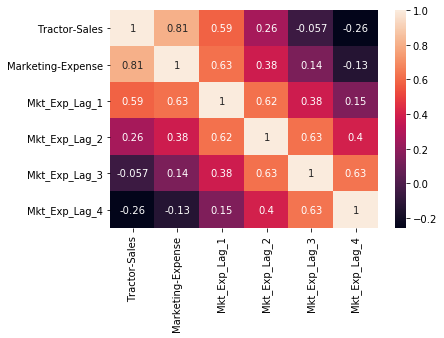

In [21]:
import seaborn as sns
sns.heatmap(tracsale_data.corr(),annot=True)

In [41]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
timeseries = tracsale_data["Tractor-Sales"]
regressors = tracsale_data[["Marketing-Expense","Mkt_Exp_Lag_1","Mkt_Exp_Lag_2"]]
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))
#best_results = model.fit()

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:273.48438715733323
                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -129.742
Date:                            Mon, 07 Sep 2020   AIC                            273.484
Time:                                    20:41:24   BIC                            283.055
Sample:                                05-01-2011   HQIC                           276.482
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing-Expense     0.0287   

In [42]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1, 0),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [43]:
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -135.148
Date:                            Mon, 07 Sep 2020   AIC                            282.295
Time:                                    20:41:28   BIC                            290.702
Sample:                                05-01-2011   HQIC                           284.985
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing-Expense     0.0016      0.041      0.040      0.968      -0.080       0.083
Mkt_Exp_Lag_1 

### Prediction/Forecasting the result

In [44]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

pred_dynamic.predicted_mean

2014-01-01    532.391295
2014-02-01    528.597682
2014-03-01    641.437130
2014-04-01    659.654425
2014-05-01    782.822456
2014-06-01    768.296021
2014-07-01    858.327968
2014-08-01    875.595194
2014-09-01    649.548057
2014-10-01    564.844682
2014-11-01    537.329170
2014-12-01    625.703260
Freq: MS, dtype: float64

In [45]:
forecast = pred_dynamic.predicted_mean
actual = tracsale_data['2014-01-01':]['Tractor-Sales']

In [46]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0327


In [47]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 678.4472
The ROOT Mean Squared Error of our forecasts is 26.04701902329708


In [48]:
# For future effect to forecast we need sales and lag values(x1 & x2). so here we need to crate a dictionary

In [49]:
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

In [50]:
Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T

In [51]:
Future_mkt_spend.columns = ['Marketing Expense', 'Mkt_Exp_Lag_1','Mkt_Exp_Lag_2']

In [52]:
Future_mkt_spend.head()

,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2
2015-01-01,600.0,559.75,527.60
2015-02-01,550.0,600.00,559.75
2015-03-01,700.0,550.00,600.00
2015-04-01,590.0,700.00,550.00
2015-05-01,480.0,590.00,700.00


In [53]:
#Forecast for next 12 Months
best_results.forecast(steps=12, exog=Future_mkt_spend)

2015-01-01    562.280028
2015-02-01    559.482882
2015-03-01    628.947676
2015-04-01    775.317136
2015-05-01    863.217368
2015-06-01    824.207618
2015-07-01    978.246620
2015-08-01    956.313066
2015-09-01    705.383957
2015-10-01    635.024932
2015-11-01    553.749842
2015-12-01    649.498406
Freq: MS, dtype: float64

In [54]:
#### Step 8: Forecast sales using the best fit ARIMA model
#The next step is to predict tractor sales for next 6 Months through the above model.

# Get forecast 12 steps (12 Months) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01, exog=Future_mkt_spend) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05, exog=Future_mkt_spend) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [55]:
pred_ci_99.head()

,lower Tractor-Sales,upper Tractor-Sales
2015-01-01,519.378935,605.181120
2015-02-01,512.541396,606.424368
2015-03-01,571.961449,685.933903
2015-04-01,713.112296,837.521976
2015-05-01,794.569086,931.865650


In [56]:
n_steps = 12
idx = pd.date_range(tracsale_data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,562.280028,519.378935,605.181120,519.378935,605.181120
2015-01-01,559.482882,512.541396,606.424368,512.541396,606.424368
2015-02-01,628.947676,571.961449,685.933903,571.961449,685.933903
2015-03-01,775.317136,713.112296,837.521976,713.112296,837.521976
2015-04-01,863.217368,794.569086,931.865650,794.569086,931.865650


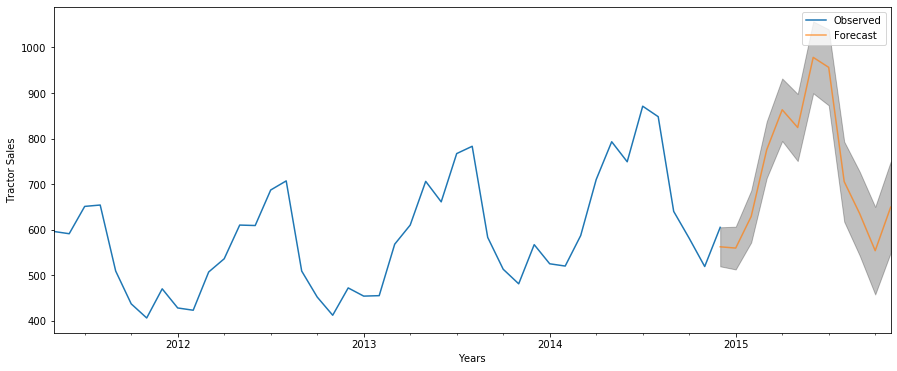

In [57]:
# plot the forecast along with the confidence band
axis = tracsale_data['Tractor-Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

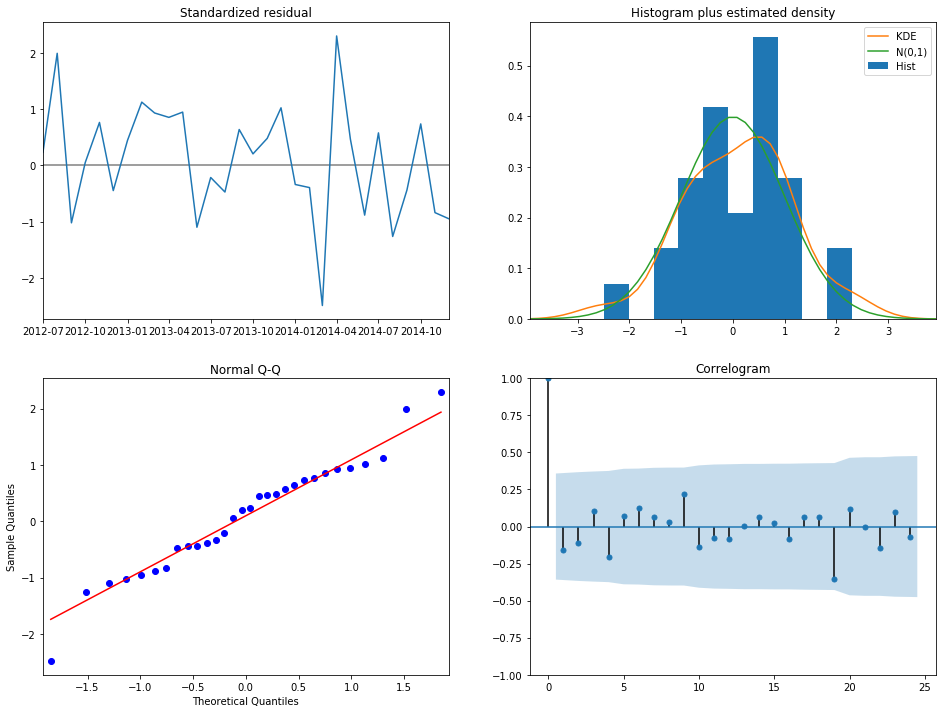

In [58]:
best_results.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()